# Análise e predição de valores ações
<div style="width: 1000px; height: 500px;">
    <img src="capa.jpeg" alt="stock-market-1000x500.jpg" width="100%" height="100%"/>
</div>


Neste notebook, iremos explorar dados do mercado de algumas ações populares do Brasil (Ambev, Bradesco, Azul e EMBRAER). Aprenderemos a utilizar o Yahoo Finance para obter informações sobre ações e visualizaremos diferentes aspectos desses dados com Seaborn e Matplotlib. Também analisaremos algumas formas de avaliar o risco de uma ação com base em seu histórico de desempenho. Além disso, faremos previsões de preços futuros de ações utilizando o método Long Short-Term Memory (LSTM).  

Responderemos às seguintes perguntas ao longo do estudo:  

1) Como o preço da ação variou ao longo do tempo?  
2) Qual foi o retorno diário médio da ação?  
3) Qual foi a média móvel das diferentes ações?  
4) Qual foi a correlação entre as ações analisadas?  
5) Quanto valor está em risco ao investir em uma ação específica?  
6) Como podemos tentar prever o comportamento futuro de uma ação? (Prevendo o preço de fechamento da Ambev S.A. usando LSTM)  
***   

## Obtendo os Dados  
O primeiro passo é obter os dados e carregá-los na memória. Utilizaremos dados do site Yahoo Finance, que oferece um vasto conjunto de informações sobre o mercado financeiro e ferramentas para encontrar investimentos promissores. Para obter os dados, utilizaremos a biblioteca yfinance, que fornece uma forma eficiente e em Python de baixar dados de mercado do Yahoo Finance. Para saber mais sobre o yfinance, confira este artigo: [Download confiável de dados históricos de mercado com Python](https://aroussi.com/post/python-yahoo-finance).

# 1. Como o preço da ação variou ao longo do tempo?

Nesta seção, abordaremos como lidar com a solicitação de informações sobre ações com pandas e como analisar atributos básicos de uma ação.

In [181]:
%pip install -q yfinance
%pip install keras
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [182]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import yfinance as yf

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['ABEV', 'BBD', 'AZUL', 'ERJ']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    ticket = yf.Ticker(stock)
    globals()[stock] = ticket.history(start=start, end=end)
    

company_list = [ABEV, BBD, AZUL, ERJ]
company_name = ["Ambev", "Bradesco", "AZUL", "EMBRAER"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,company_name
Date,,,,,,,,
2025-02-11 00:00:00-05:00,42.000000,42.150002,41.389999,41.790001,1257100,0.0,0.0,EMBRAER
2025-02-12 00:00:00-05:00,41.160000,41.560001,41.020000,41.430000,886100,0.0,0.0,EMBRAER
2025-02-13 00:00:00-05:00,41.060001,42.160000,41.020000,42.160000,1092300,0.0,0.0,EMBRAER
2025-02-14 00:00:00-05:00,42.310001,42.700001,42.080002,42.209999,1372600,0.0,0.0,EMBRAER
2025-02-18 00:00:00-05:00,42.250000,42.740002,41.950001,42.590000,955200,0.0,0.0,EMBRAER
2025-02-19 00:00:00-05:00,42.480000,42.970001,42.270000,42.750000,972800,0.0,0.0,EMBRAER
2025-02-20 00:00:00-05:00,42.740002,43.250000,42.709999,43.080002,848500,0.0,0.0,EMBRAER
2025-02-21 00:00:00-05:00,42.810001,42.910000,40.990002,41.240002,1472800,0.0,0.0,EMBRAER
2025-02-24 00:00:00-05:00,41.430000,41.680000,40.330002,41.529999,1280600,0.0,0.0,EMBRAER


Revisando o conteúdo dos nossos dados, podemos ver que os dados são numéricos e a data é o índice dos dados. Observe também que os fins de semana estão faltando nos registros.

**Nota rápida:** Usar `globals()` é uma maneira desleixada de definir os nomes `DataFrame`, mas é simples. Agora que temos nossos dados, vamos executar algumas análises básicas de dados e verificar nossos dados.

## Estatísticas descritivas sobre os dados
`.describe()` gera estatísticas descritivas. Estatísticas descritivas incluem aquelas que resumem a tendência central, dispersão e forma da distribuição de um conjunto de dados, excluindo valores `NaN`.

Analisa séries numéricas e de objetos, bem como conjuntos de colunas `DataFrame` de tipos de dados mistos. A saída variará dependendo do que for fornecido. Consulte as notas abaixo para obter mais detalhes.

In [183]:
# Summary Stats
ABEV.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.0,251.0
mean,2.215737,2.237849,2.189602,2.212908,2.496550e+07,0.0,0.0
std,0.208566,0.210301,0.209135,0.210787,1.698383e+07,0.0,0.0
min,1.780000,1.800000,1.760000,1.770000,3.218000e+06,0.0,0.0
25%,2.090000,2.110000,2.065000,2.090000,1.422925e+07,0.0,0.0
50%,2.260000,2.280000,2.230000,2.260000,2.024530e+07,0.0,0.0
75%,2.360000,2.380000,2.335000,2.360000,3.070250e+07,0.0,0.0
max,2.680000,2.720000,2.660000,2.690000,1.349556e+08,0.0,0.0


Temos apenas 255 registros em um ano porque os fins de semana não estão incluídos nos dados.

## Informações sobre os dados
O método `.info()` imprime informações sobre um DataFrame, incluindo o índice `dtype` e colunas, valores não nulos e uso de memória.

In [184]:
# General info
ABEV.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-02-26 00:00:00-05:00 to 2025-02-25 00:00:00-05:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Volume        251 non-null    int64  
 5   Dividends     251 non-null    float64
 6   Stock Splits  251 non-null    float64
 7   company_name  251 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 17.6+ KB


## Preço de Fechamento

O preço de fechamento é o último preço pelo qual a ação é negociada durante o dia de negociação regular. O preço de fechamento de uma ação é o benchmark padrão usado por investidores para rastrear seu desempenho ao longo do tempo.

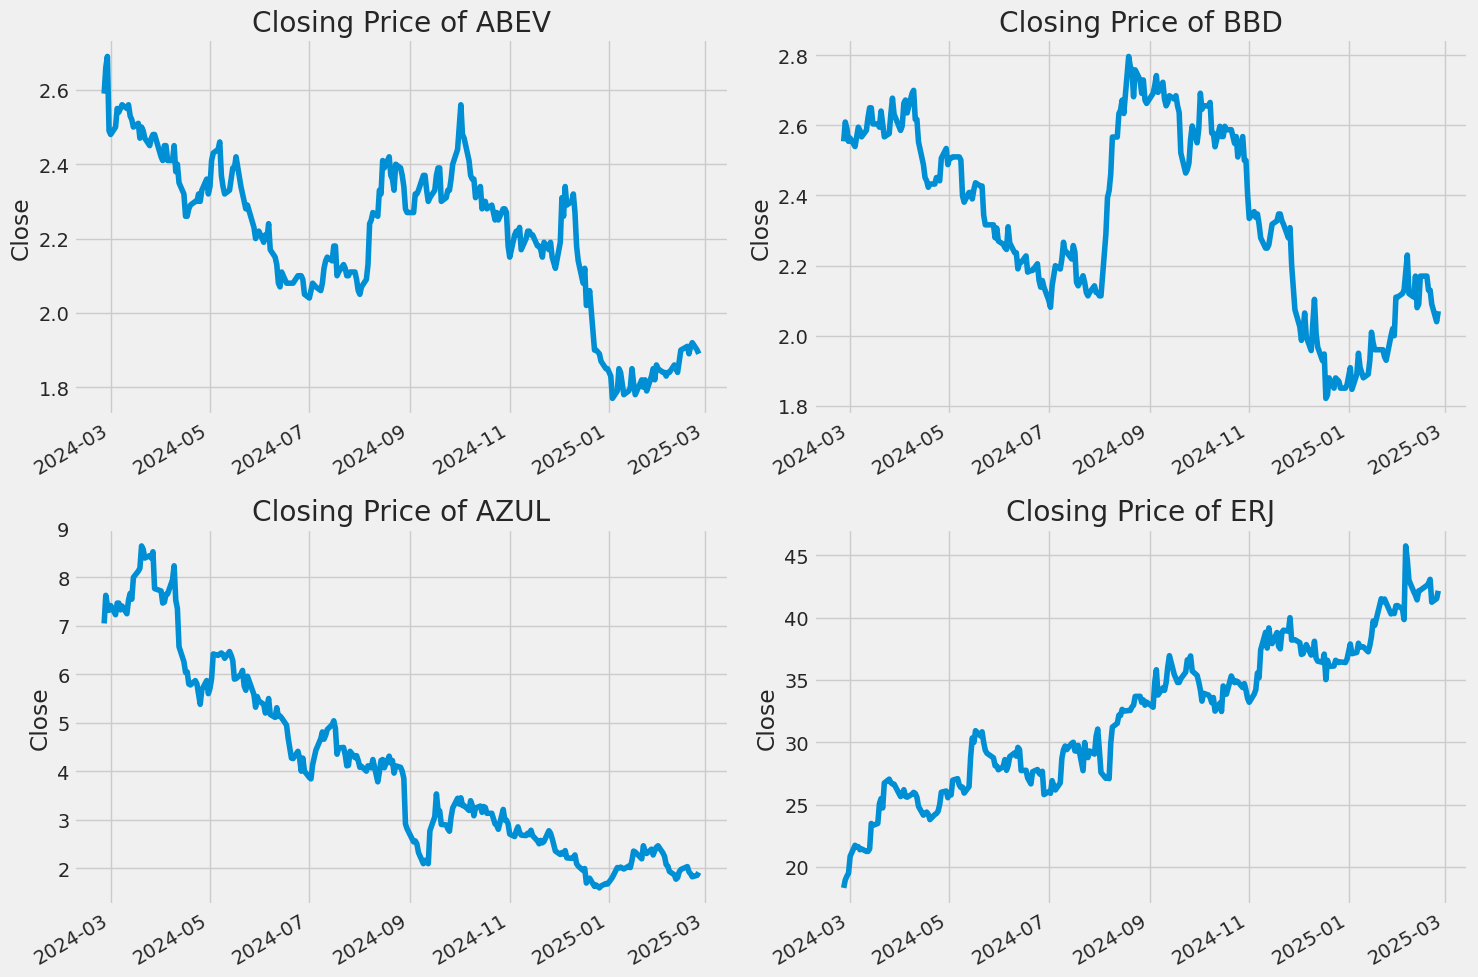

In [185]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume de Vendas
Volume é a quantidade de um ativo ou título que muda de mãos ao longo de um período de tempo, geralmente ao longo de um dia. Por exemplo, o volume de negociação de ações se referiria ao número de ações de título negociadas entre sua abertura e fechamento diários. O volume de negociação e as mudanças no volume ao longo do tempo são entradas importantes para traders técnicos.

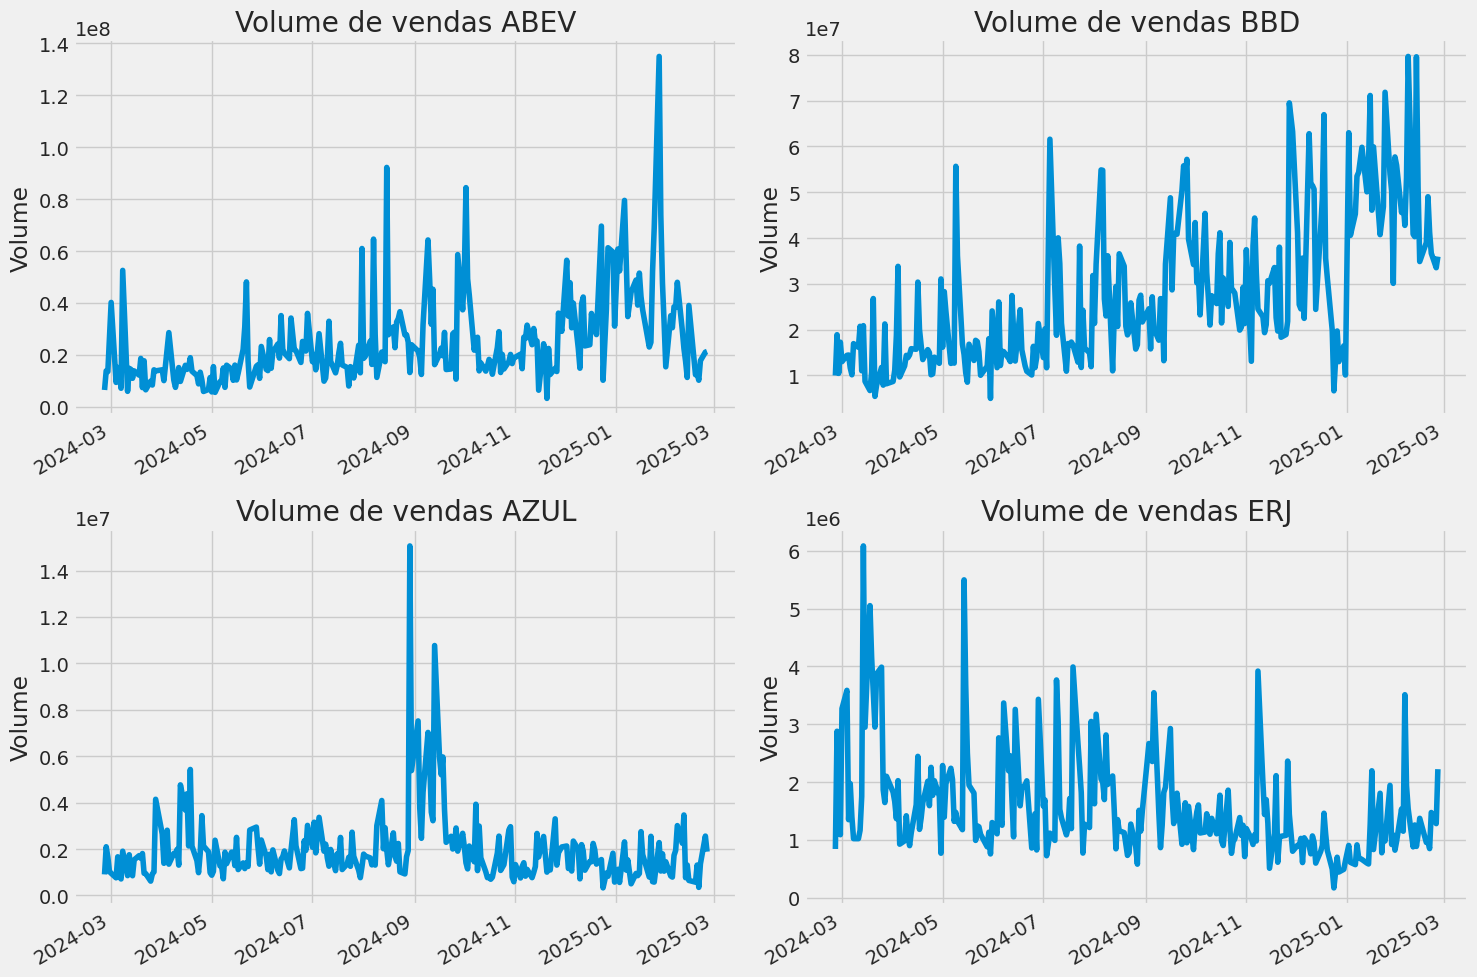

In [186]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume de vendas {tech_list[i - 1]}")
    
plt.tight_layout()

Agora que vimos as visualizações do preço de fechamento e do volume negociado a cada dia, vamos calcular a média móvel da ação.

# 2. Qual foi o retorno diário médio da ação?

A média móvel (MA) é uma ferramenta simples de análise técnica que suaviza dados de preço criando um preço médio constantemente atualizado. A média é tomada em um período de tempo específico, como 10 dias, 20 minutos, 30 semanas ou qualquer período de tempo que o trader escolher.

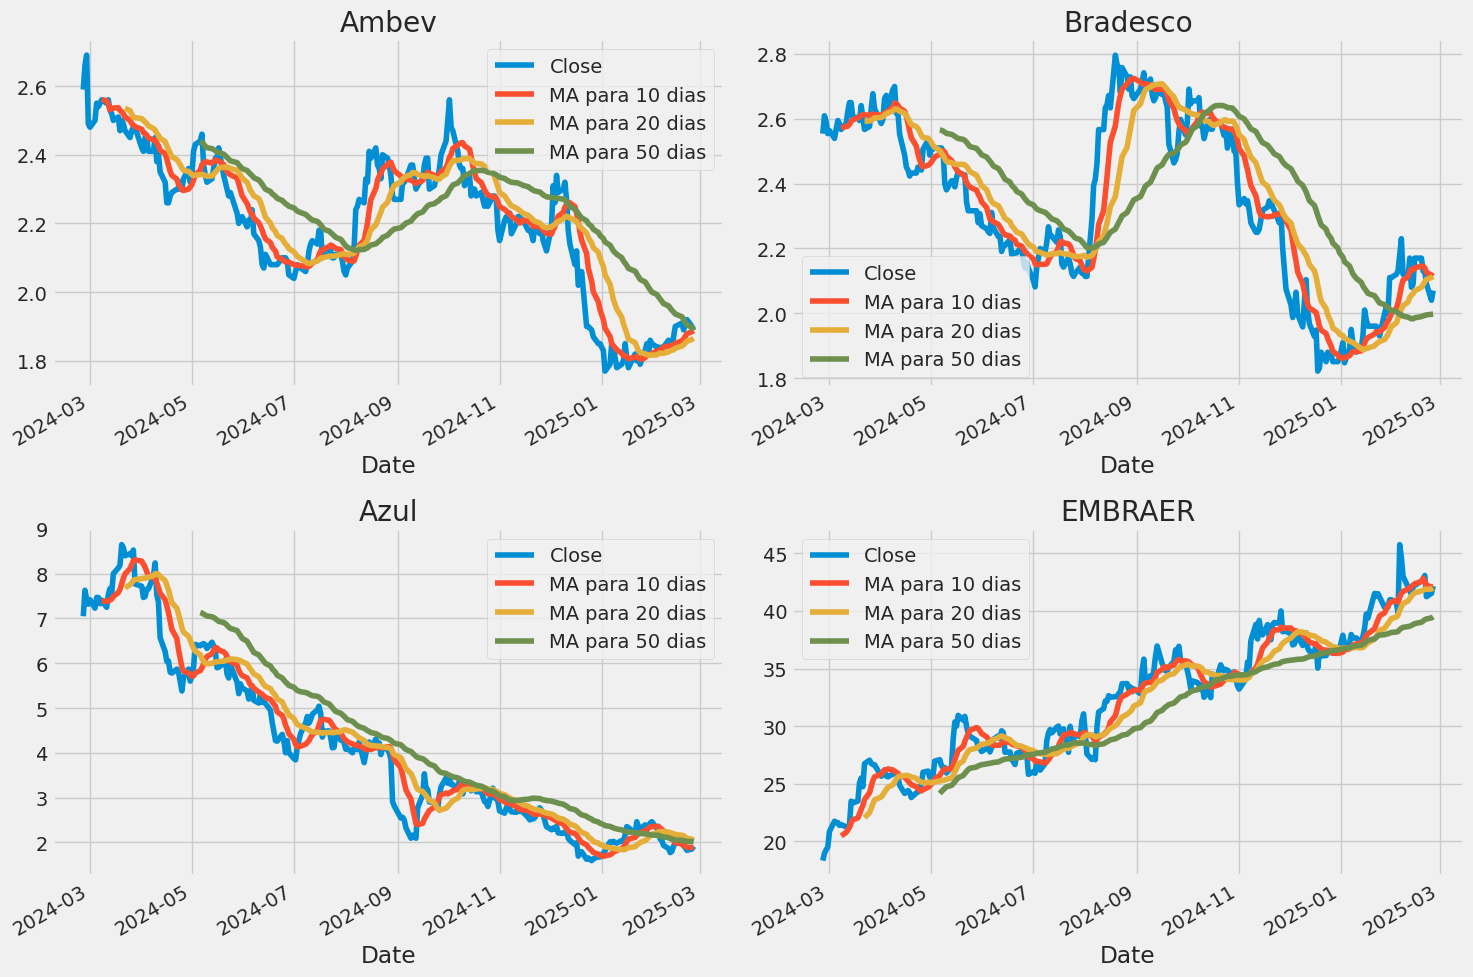

In [187]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA para {ma} dias"
        company[column_name] = company['Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

ABEV[['Close', 'MA para 10 dias', 'MA para 20 dias', 'MA para 50 dias']].plot(ax=axes[0,0])
axes[0,0].set_title('Ambev')

BBD[['Close', 'MA para 10 dias', 'MA para 20 dias', 'MA para 50 dias']].plot(ax=axes[0,1])
axes[0,1].set_title('Bradesco')

AZUL[['Close', 'MA para 10 dias', 'MA para 20 dias', 'MA para 50 dias']].plot(ax=axes[1,0])
axes[1,0].set_title('Azul')

ERJ[['Close', 'MA para 10 dias', 'MA para 20 dias', 'MA para 50 dias']].plot(ax=axes[1,1])
axes[1,1].set_title('EMBRAER')

fig.tight_layout()

Vemos no gráfico que os melhores valores para medir a média móvel são 10 e 20 dias porque ainda capturamos tendências nos dados sem ruído.

# 3. Qual foi a média móvel das diferentes ações?  

Agora que fizemos algumas análises de base, vamos em frente e mergulhar um pouco mais fundo. Agora vamos analisar o risco da ação. Para fazer isso, precisaremos dar uma olhada mais de perto nas mudanças diárias da ação, e não apenas em seu valor absoluto. Vamos em frente e usar pandas para recuperar os retornos diários da ação da Ambev.

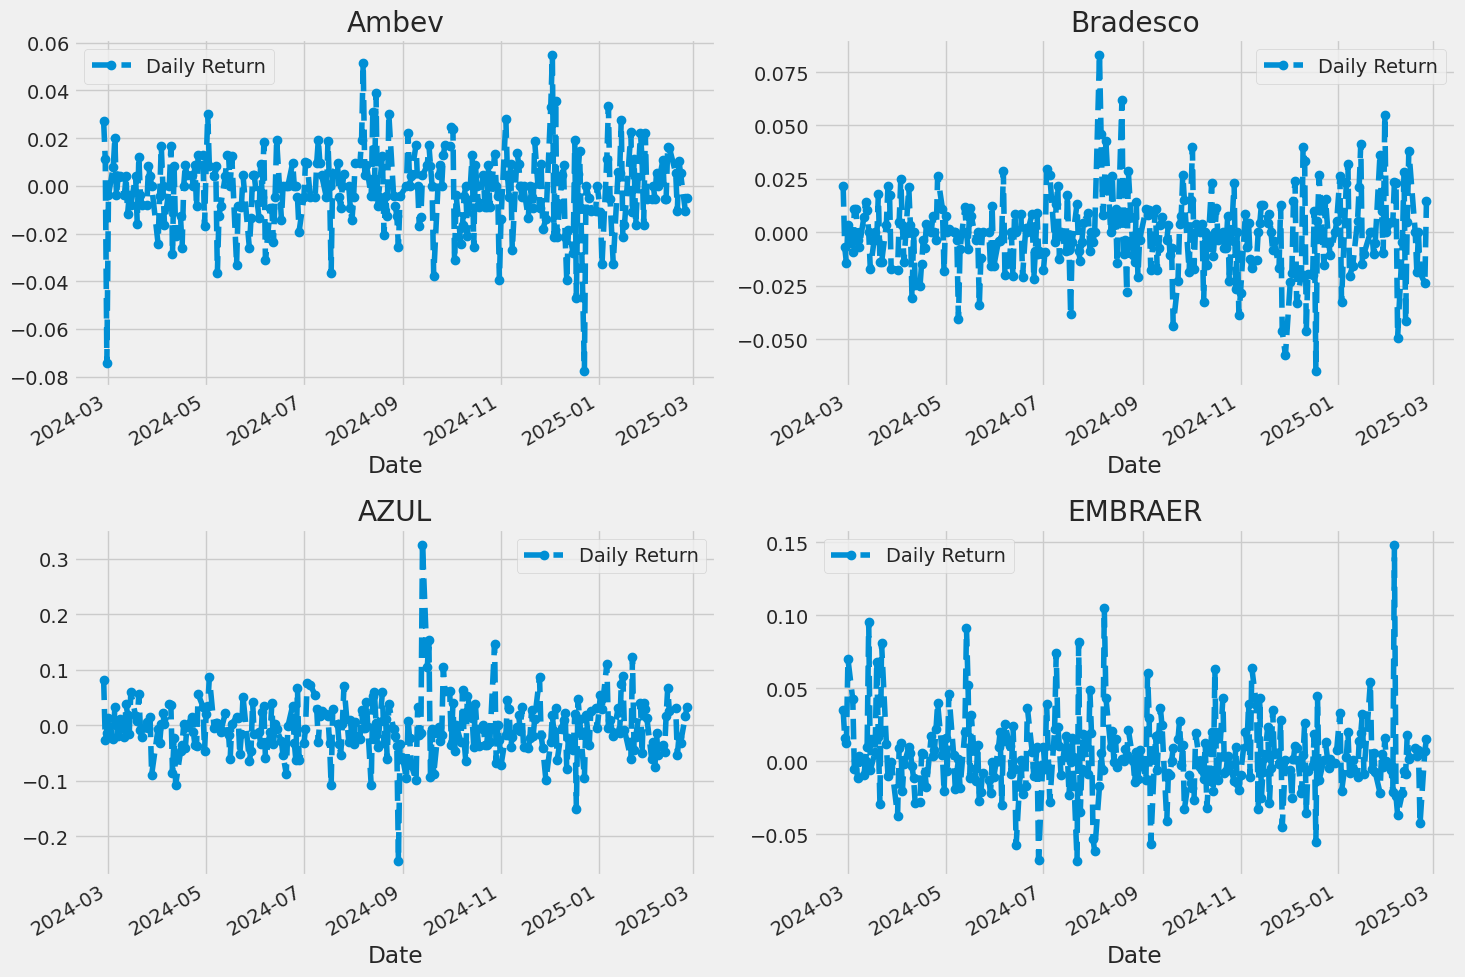

In [188]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

ABEV['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Ambev')

BBD['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Bradesco')

AZUL['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('AZUL')

ERJ['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('EMBRAER')

fig.tight_layout()

Ótimo, agora vamos dar uma olhada geral no retorno médio diário usando um histograma. Usaremos o seaborn para criar um histograma e um gráfico kde na mesma figura.

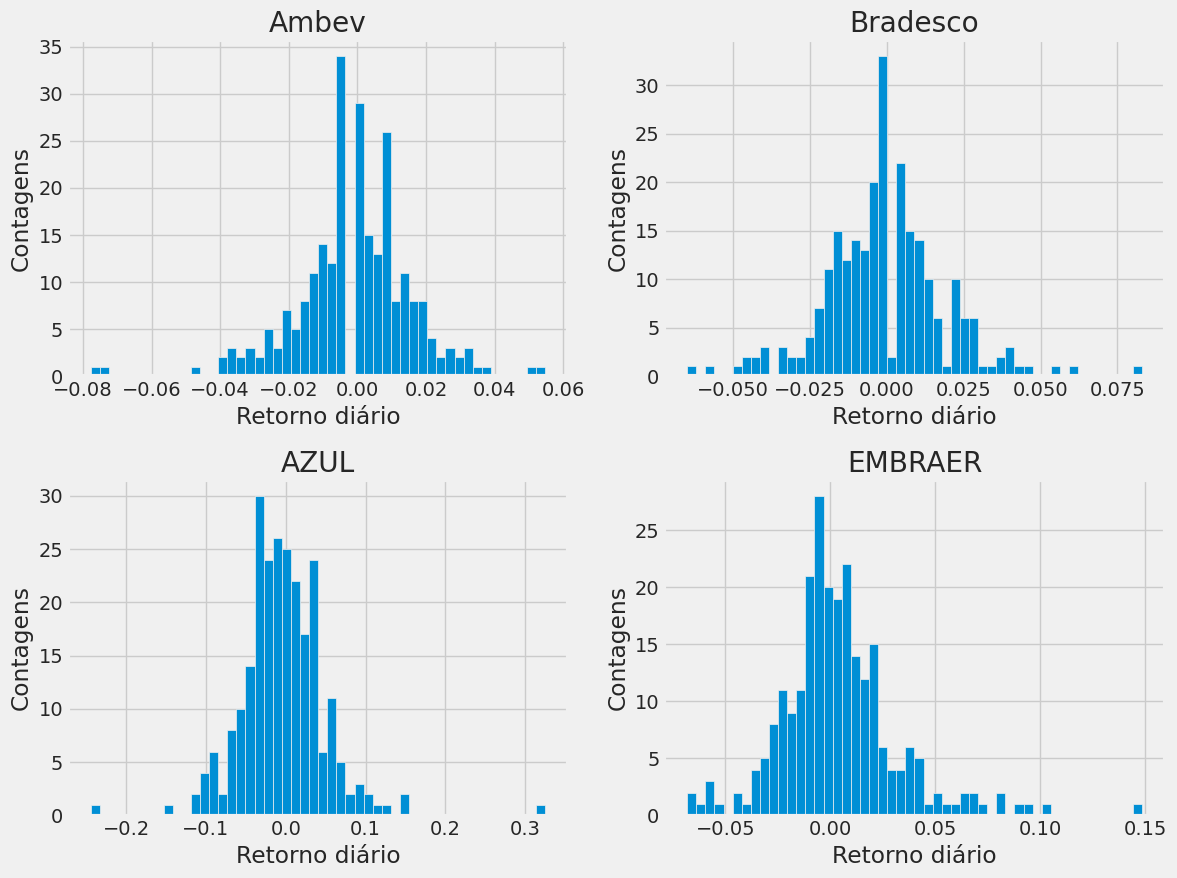

In [189]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Retorno diário')
    plt.ylabel('Contagens')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

# 4. Qual foi a correlação entre as ações analisadas?  

Correlação é uma estatística que mede o grau em que duas variáveis ​​se movem em relação uma à outra, que tem um valor que deve estar entre -1,0 e +1,0. A correlação mede a associação, mas não mostra se x causa y ou vice-versa — ou se a associação é causada por um terceiro fator[1].

Agora, e se quiséssemos analisar os retornos de todas as ações em nossa lista? Vamos em frente e construir um DataFrame com todas as colunas ['Fechar'] para cada um dos dataframes de ações.

In [190]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start=start, end=end)['Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker,ABEV,AZUL,BBD,ERJ
Date,,,,
2024-02-26,NaN,NaN,NaN,NaN
2024-02-27,0.027027,0.082269,0.021583,0.034954
2024-02-28,0.011278,-0.026212,-0.007042,0.015831
2024-02-29,-0.074349,-0.014805,-0.014184,0.012468
2024-03-01,-0.004016,0.013661,0.003597,0.069779


Agora podemos comparar o retorno percentual diário de duas ações para verificar o quão correlacionadas. Primeiro, vamos ver uma sotck comparada a si mesma.

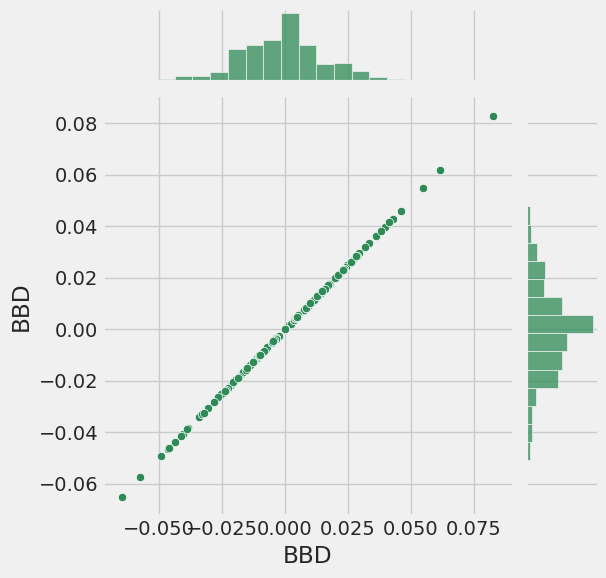

In [ ]:
# Comparing Bradesco to itself should show a perfectly linear relationship
sns.jointplot(x='BBD', y='BBD', data=tech_rets, kind='scatter', color='seagreen')

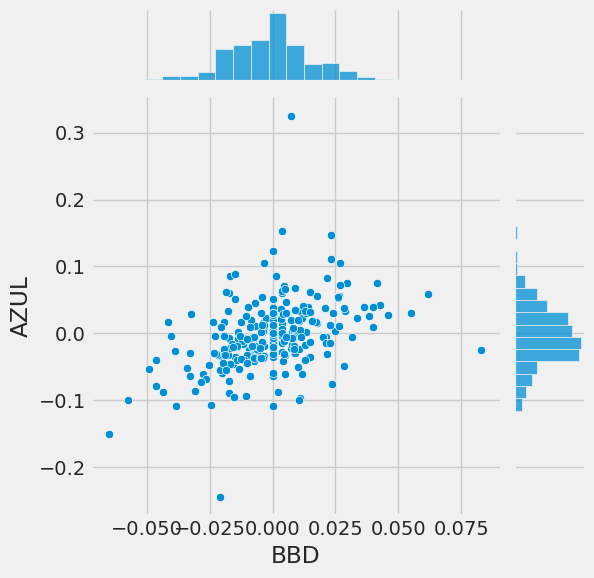

In [207]:
# We'll use joinplot to compare the daily returns of Bradesco and Azul
sns.jointplot(x='BBD', y='AZUL', data=tech_rets, kind='scatter')

Então agora podemos ver que se duas ações são perfeitamente (e positivamente) correlacionadas entre si, uma relação linear entre seus valores de retorno diário deve ocorrer.

Seaborn e pandas tornam muito fácil repetir essa análise de comparação para cada combinação possível de ações em nossa lista de tickers de ações de tecnologia. Podemos usar sns.pairplot() para criar automaticamente esse gráfico

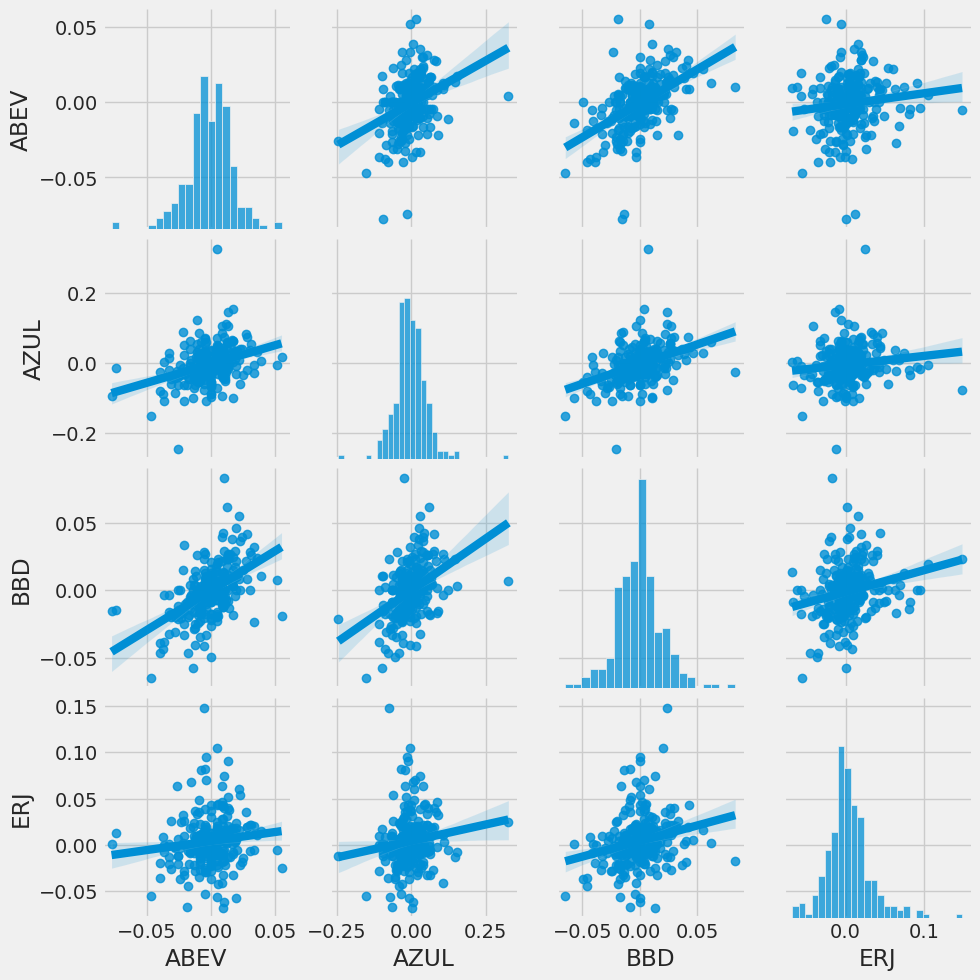

In [193]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Embora a simplicidade de apenas chamar `sns.pairplot()` seja fantástica, também podemos usar `sns.PairGrid()` para controle total da figura, incluindo que tipo de plotagens vão na diagonal, no triângulo superior e no triângulo inferior. Abaixo está um exemplo de utilização de todo o poder do seaborn para atingir esse resultado.

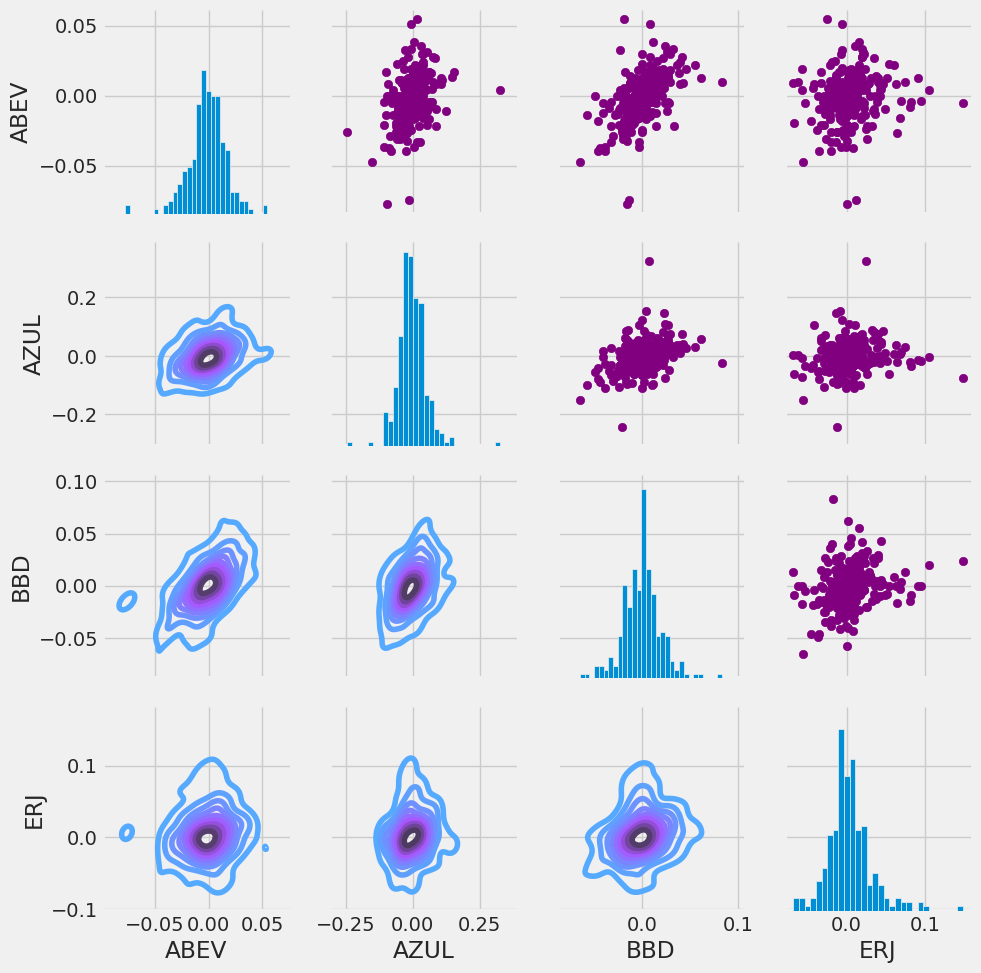

In [194]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

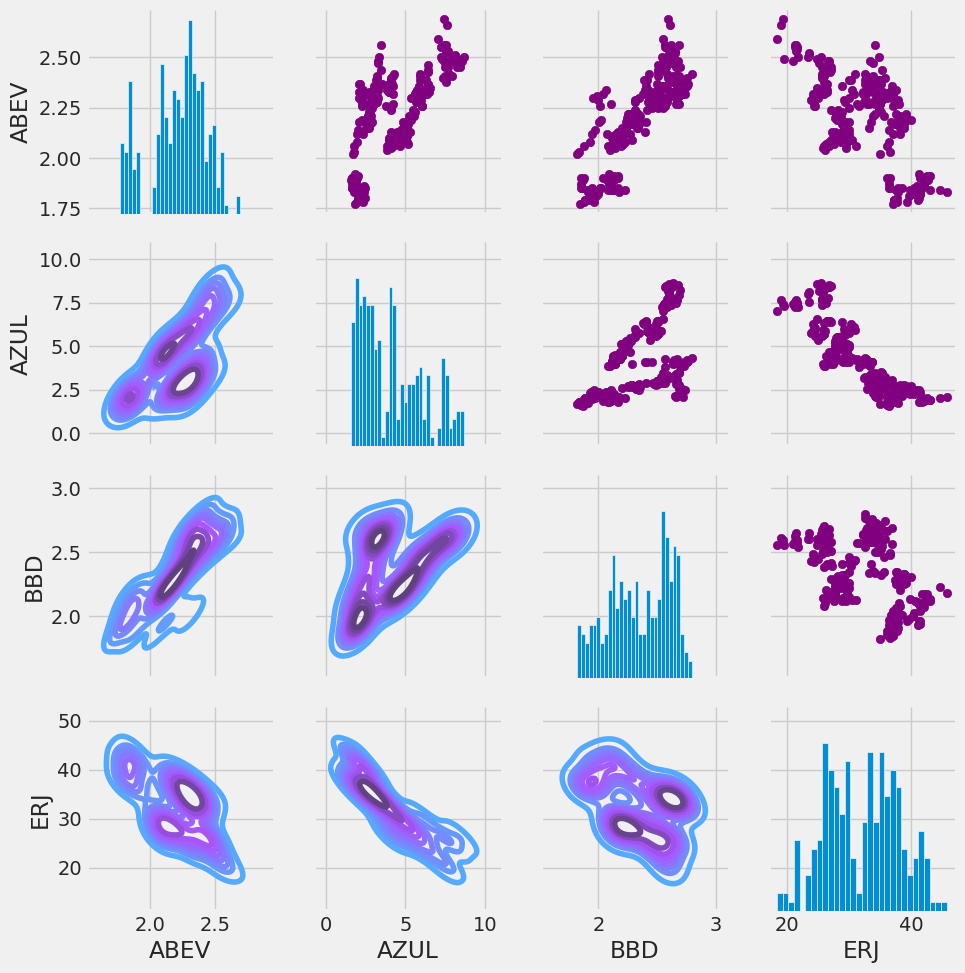

In [195]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finalmente, também poderíamos fazer um gráfico de correlação, para obter valores numéricos reais para a correlação entre os valores de retorno diário das ações.

Text(0.5, 1.0, 'Correlation of stock closing price')

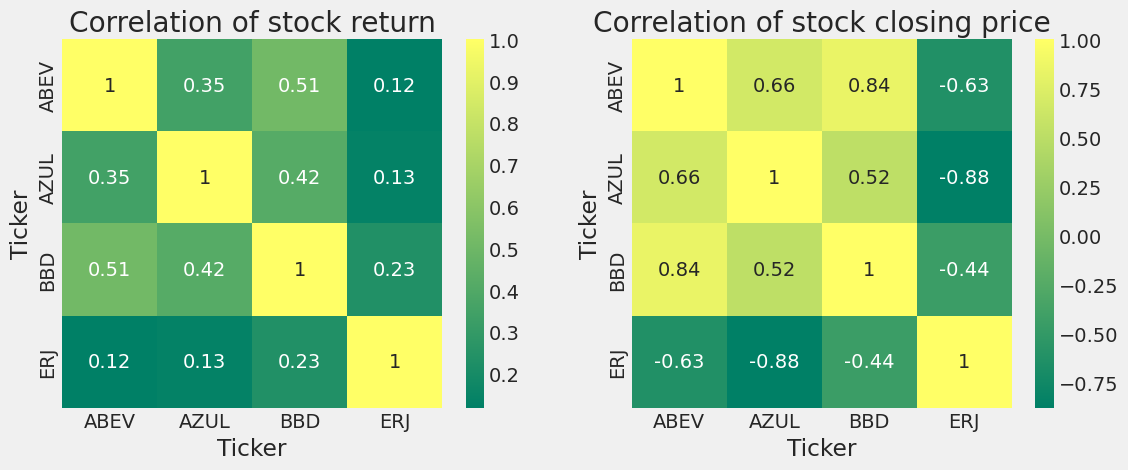

In [196]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Assim como suspeitávamos em nosso `PairPlot`, vemos aqui numericamente e visualmente que a Bradesco e a Ambev tiveram a correlação mais forte de retorno diário de ações.

# 5. Quanto valor está em risco ao investir em uma ação específica?  

Há muitas maneiras de quantificar o risco. Uma das maneiras mais básicas de usar as informações que coletamos sobre retornos percentuais diários é comparar o retorno esperado com o desvio padrão dos retornos diários.

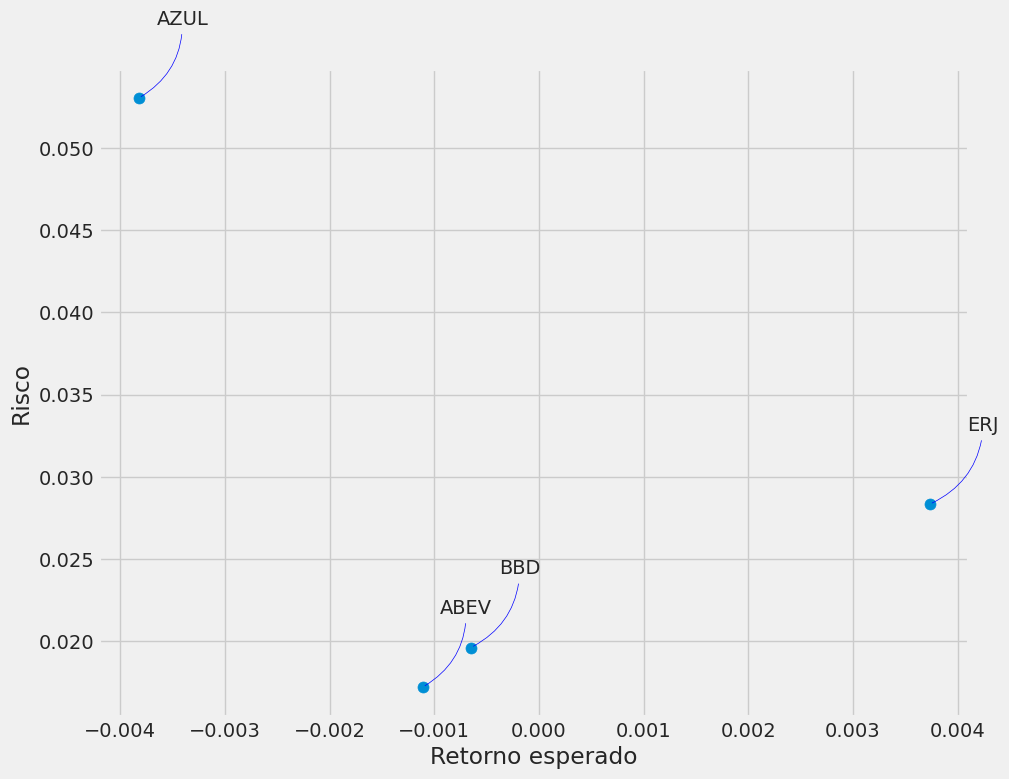

In [197]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Retorno esperado')
plt.ylabel('Risco')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Prevendo o preço de fechamento da Ambev S.A. usando LSTM

[*********************100%***********************]  1 of 1 completed


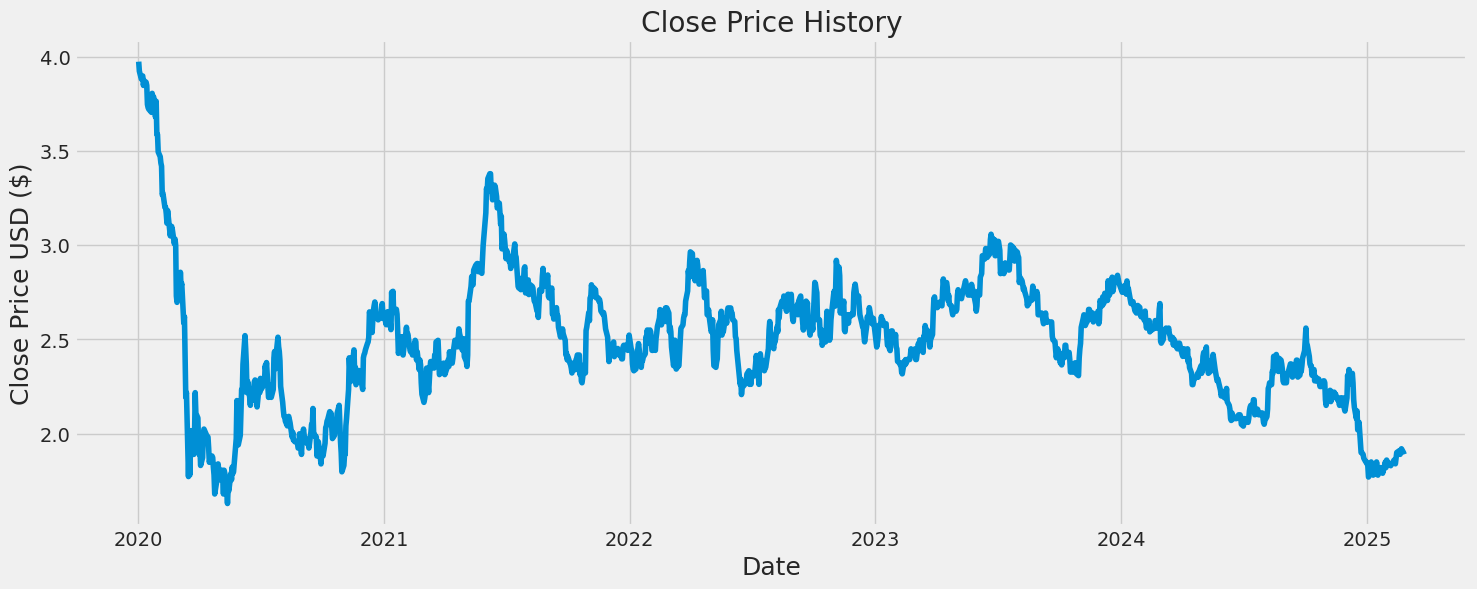

In [198]:
# Get the stock quote
df = yf.download('ABEV', start='2020-01-01', end=datetime.now())
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [199]:
# # Create a new dataframe with only the 'Close column 
# Convert the dataframe to a numpy array
dataset =  df[['Close']].values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1230

Pré-processamento dos dados antes do treinamento, usando a técnica MinMax

In [200]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.        ],
       [0.97849445],
       [0.96057333],
       ...,
       [0.12391438],
       [0.11538048],
       [0.11111354]])

Separação dos conjuntos de treino e teste

In [201]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([1.        , 0.97849445, 0.96057333, 0.96415766, 0.96774188,
       0.94623654, 0.95698911, 0.95340489, 0.94623654, 0.90322575,
       0.8960573 , 0.89247288, 0.88530443, 0.92831532, 0.89964132,
       0.92114677, 0.87455196, 0.9103942 , 0.8351255 , 0.8351255 ,
       0.79569883, 0.78494616, 0.77060936, 0.76344081, 0.69892478,
       0.70250901, 0.67025089, 0.67025089, 0.65591389, 0.63440855,
       0.66308234, 0.60573476, 0.62007165, 0.62724   , 0.62007165,
       0.58781354, 0.59856621, 0.58422931, 0.46953415, 0.45519715,
       0.49103949, 0.48028662, 0.52329761, 0.49103949, 0.49820794,
       0.40860204, 0.42293903, 0.32616478, 0.24014331, 0.25089608,
       0.06093186, 0.12903226, 0.06451618, 0.14336916, 0.16487461,
       0.11111109, 0.11111109, 0.15412183, 0.25089608, 0.20430107])]
[0.19354829520975259]

[array([1.        , 0.97849445, 0.96057333, 0.96415766, 0.96774188,
       0.94623654, 0.95698911, 0.95340489, 0.94623654, 0.90322575,
       0.8960573 , 0.89247288, 0.88

Treinando modelo LSTM

In [202]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/opt/conda/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1170/1170 ━━━━━━━━━━━━━━━━━━━━ 225s 180ms/step - loss: 0.0056


Cálculando Error quadrático médio, para saber a qualidade do treinamento

In [203]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 691ms/step


0.12215078760137495

In [204]:
# Plot the data
train = df[['Close']][:training_data_len]
valid = df[['Close']][training_data_len:]
valid['Predictions'] = predictions


Visualizando resultado da predição

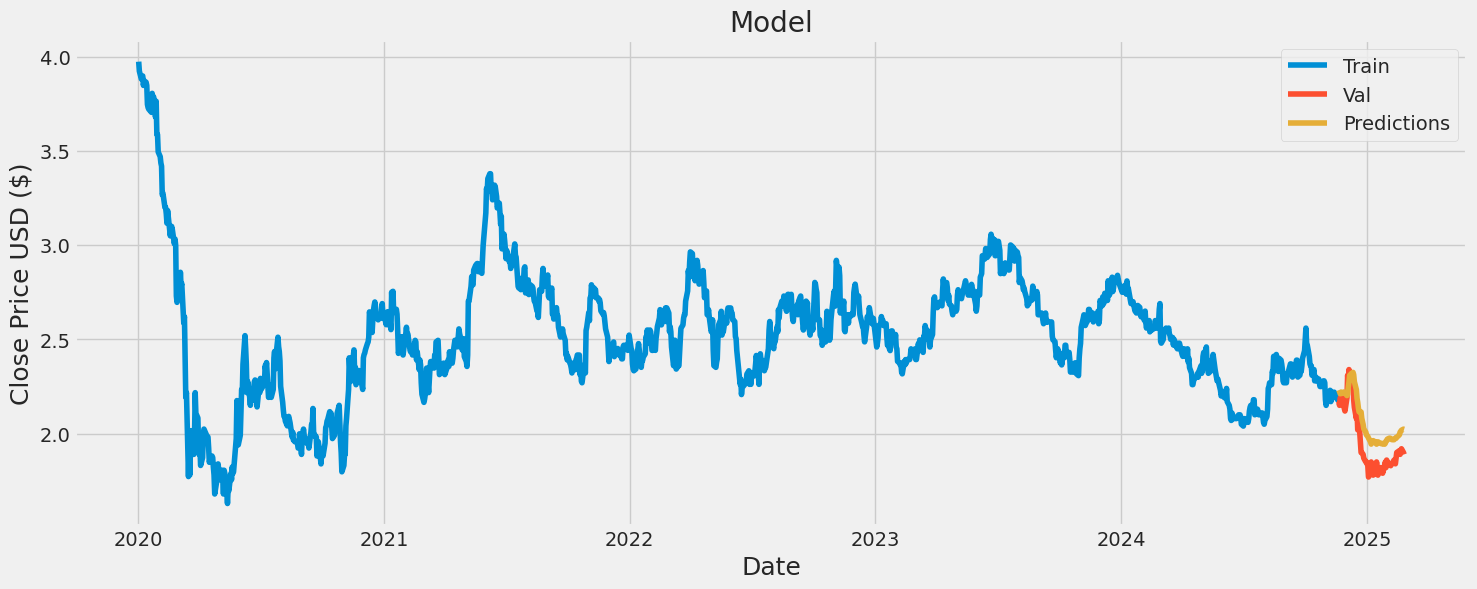

In [205]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [206]:
# Show the valid and predicted prices
valid

Price,Close,Predictions
Ticker,ABEV,
Date,,
2024-11-20,2.17,2.231222
2024-11-21,2.15,2.222558
2024-11-22,2.19,2.211722
2024-11-25,2.17,2.214216
2024-11-26,2.19,2.215283
...,...,...
2025-02-19,1.89,2.007950
2025-02-20,1.91,2.013009


Olhando o gráfico e os valores das predições podemos ver que o modelo LSTM previu aproximadamente os valores das ações :)

# Referências e links úteis para se aprofundar

[Arquitetura de Redes Neurais Long Short Term Memory (LSTM)](https://www.deeplearningbook.com.br/arquitetura-de-redes-neurais-long-short-term-memory/)

Vídeo [Long Short-Term Memory (LSTM), claramente explicado](https://www.youtube.com/watch?v=YCzL96nL7j0)

Vídeos sobre cuidados ao usar LSTM ao prever valores de ações: 
1. [Predicting Stock Prices with LSTMs: One Mistake Everyone Makes (Episode 16)](https://www.youtube.com/watch?v=Vfx1L2jh2Ng)
2. [Stock Price Prediction with Machine Learning Mistakes: Prices As Inputs (Episode 20)](https://www.youtube.com/watch?v=aIklUbW0UWI)
3. [Common Mistakes in Stock Price Prediction: Prices As Targets (Episode 21)](https://www.youtube.com/watch?v=xOcyV5Q2G5I)

Notebook usado como Base [📊Stock Market Analysis 📈 + Prediction using LSTM](https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm)

[biblioteca do Yahoo finance para obter dados financeiros](https://aroussi.com/post/python-yahoo-finance)